<table align="left">
  <td>
    <a href="https://is.gd/sORygL" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Exercício 4

A janela está sendo construída de forma que a mesma é constituída de um retângulo com um semicírculo no topo. Se houver 12 m de materiais de enquadramento, qual devem ser as dimensões da janela para se permitir a maior entrada de luz externa?

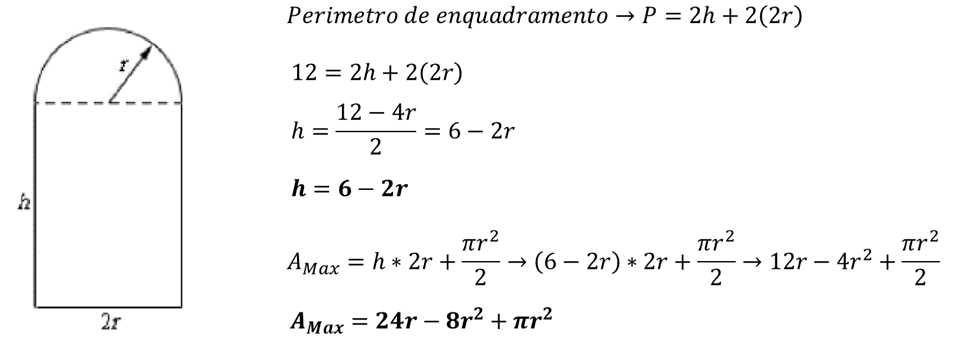

## Instalar pacote DEAP

In [38]:
!pip install deap

# Importar bibliotecas necessárias

In [39]:
import matplotlib.pyplot as plt
from deap import base, creator, tools
import operator
import random
import numpy
import math

## Partícula

part = [r]

   - **r**: radio

   
   
**Observação:** altura = $6-r$

**Observação:** base: $2r$


# Função objetivo

   - Função objetivo com objetivo de maximizar o volume

In [40]:
def objective_function(individual):
    area_max = (24*individual[0])-(8*individual[0]**2)+(math.pi*individual[0]**2)
    return area_max,

# Restrição do problema


- Verificar partícula - restrições impostas as partículas
  - Há uma restrição no tamanho do perimetro de enquadramento = 12
  - Ja foi incluido na função objetivo.

In [41]:
#def feasible(individual):
#        if individual[0] > 10:
#          return False
#        return True
#
# Não tenho restrições pois ja foi incluido na função objetivo.

## Criando a função de Minimização e a estrutura da partícula

In [42]:
#  função objetivo: nome, tipo(f.o.), o peso deve ser 1.0 para esse caso (função de maximização)
creator.create("FitnessMin", base.Fitness, weights=(1.0,))
creator.create("Particle", list, fitness=creator.FitnessMin, speed=list, smin=None, smax=None, best=None)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Particle' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


## Definindo uma função para gerar a partícula

In [43]:
# Função que cria uma partícula inicializando os atributos aleatoriamente.
# size é o número de variáveis de decisão, pmin e pmax são os limites das variáveis, smin e smax são os limites de velocidade
def generate(size, pmin, pmax, smin, smax):
    part = creator.Particle(random.uniform(pmin, pmax) for _ in range(size)) 
    part.speed = [random.uniform(smin, smax) for _ in range(size)]
    part.smin = smin
    part.smax = smax
    return part

## Definindo a função para atualização da partícula 

In [44]:
# Esta função calcula a velocidade, os limites de veloicidade e a nova posição da partícula
# phi1 = fator cognitivo e phi2 = fator social
def updateParticle(part, best, phi1, phi2):
    u1 = (random.uniform(0, phi1) for _ in range(len(part)))
    u2 = (random.uniform(0, phi2) for _ in range(len(part)))
    v_u1 = map(operator.mul, u1, map(operator.sub, part.best, part)) # indo em direção ao melhor conhecido pela partícula
    v_u2 = map(operator.mul, u2, map(operator.sub, best, part)) # indo em direção ao melhor da vizinhaça
    part.speed = list(map(operator.add, part.speed, map(operator.add, v_u1, v_u2)))
    for i, speed in enumerate(part.speed):
        if abs(speed) < part.smin:
            part.speed[i] = math.copysign(part.smin, speed)
        elif abs(speed) > part.smax:
            part.speed[i] = math.copysign(part.smax, speed)
    part[:] = list(map(operator.add, part, part.speed))

## Criando o toolbox

In [45]:
toolbox = base.Toolbox()

# Função para gerar a partícula com valores 
toolbox.register("particle", generate, size=1, pmin=0, pmax=12, smin=-2, smax=2)

# Adicionando a função para gerar a população
toolbox.register("population", tools.initRepeat, list, toolbox.particle)

# Adicionando a função para atualizar a população
toolbox.register("update", updateParticle, phi1=2.0, phi2=2.0)

# Adicionando as funções para avaliar a população
toolbox.register("evaluate", objective_function)
#toolbox.decorate("evaluate", tools.DeltaPenalty(feasible, -100000000))

## Definindo parêmetros para o PSO

   - **initial_population:** Número de inidivíduos da população inicial
   - **num_gen:** Número de iterações
   - **best:** Melhor partícula

In [46]:
initial_population = 100    
num_ite = 1000
best = None

### Criando a população inicial

In [47]:
# inicializando a população
pop = toolbox.population(n=initial_population)

### Estatísticas de avaliação (a cada geração)

   - Função objetivo
   - Média
   - Desvio padrão
   - Mínimo
   - Máximo

In [48]:
# estatísticas
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

### Definindo um log para avaliar as partículas ao longo das iterações

In [49]:
logbook = tools.Logbook()
logbook.header = ["gen", "evals"] + stats.fields

## Otimização

In [50]:
# Roda a otimização
for iteration in range(num_ite):
    for part in pop:
        part.fitness.values = toolbox.evaluate(part)
        # atualiza melhor da partícula
        if not part.best or part.best.fitness < part.fitness:
            part.best = creator.Particle(part)
            part.best.fitness.values = part.fitness.values
        # atualiza melhor global
        if not best or best.fitness < part.fitness:
            best = creator.Particle(part)
            best.fitness.values = part.fitness.values
    for part in pop:
        toolbox.update(part, best)

    # Salva todos os fitnesses em uma lista e imprime o status
    logbook.record(gen=iteration, evals=len(pop), **stats.compile(pop))
    print(logbook.stream)

gen	evals	avg     	std    	min     	max   
0  	100  	-93.7586	132.855	-391.986	29.634
1  	100  	-42.6971	92.5196	-363.158	29.639
2  	100  	-4.04672	48.9906	-207.852	29.6383
3  	100  	14.9181 	20.7113	-91.4131	29.6383
4  	100  	21.0735 	10.0326	-13.8418	29.6393
5  	100  	20.4902 	8.95829	-14.2844	29.6391
6  	100  	22.2098 	8.73981	-7.37774	29.6393
7  	100  	21.8281 	8.4895 	-15.1378	29.6388
8  	100  	20.2651 	11.5087	-47.9421	29.6392
9  	100  	22.3162 	8.97458	-16.9022	29.6364
10 	100  	22.7803 	7.23498	-3.11953	29.6393
11 	100  	23.1239 	7.84176	1.00596 	29.6386
12 	100  	22.223  	8.04426	-11.6149	29.6393
13 	100  	23.4628 	7.34973	-12.2313	29.6359
14 	100  	22.3254 	9.54293	-26.3765	29.6393
15 	100  	20.7573 	9.74657	-21.3345	29.6391
16 	100  	23.8178 	7.69328	-4.76544	29.6388
17 	100  	22.4528 	7.20831	-8.85835	29.6393
18 	100  	22.933  	9.54556	-23.8939	29.6393
19 	100  	22.3767 	7.48381	-5.42881	29.6393
20 	100  	22.9445 	9.88122	-36.7026	29.6393
21 	100  	22.6044 	8.00249	-13.0959

## Melhor indivíduo

In [51]:
print('Radio: ', (best[0]))
print('Base: ', (2*best[0]))
print('Altura: ', 6-2*best[0])

Radio:  2.4699452670743822
Base:  4.9398905341487644
Altura:  1.0601094658512356


## Avaliação do melhor indivíduo

In [52]:
print('Área Maxima: ',objective_function(best))

Área Maxima:  (29.639342634865532,)


In [53]:
#Perimetro de Enquadramento
h = 6-2*best[0]
b= 2*best[0]
P = 2*h+2*b
print('Perimetro de Enquadratura (12m): ',P)

Perimetro de Enquadratura (12m):  12.0
